# Evaluate simple linear regression

## Introduction

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [2]:
# Import pandas, pyplot from matplotlib, and seaborn.

### YOUR CODE HERE ### 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 


### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [44]:
# Import the statsmodel module.

# Import the ols function from statsmodels.

### YOUR CODE HERE ###
import statsmodels.formula.api as sm 
import statsmodels.api as stats

### Load the dataset

`Pandas` was used to load the provided dataset `marketing_and_sales_data_evaluate_lr.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [8]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

### Explore the data size

Calculate the number of rows and columns in the data.

In [9]:
# Display the shape of the data as a tuple (rows, columns).

### YOUR CODE HERE ### 

data.shape 

(4572, 4)

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [11]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

### YOUR CODE HERE ###

data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [18]:
# Calculate the average missing rate in the sales column.

### YOUR CODE HERE ###
missing_sales = data.Sales.isna().mean()
missing_sales
# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.

### YOUR CODE HERE ###
missing_sales = round((missing_sales * 100),2)
missing_sales
# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).

### YOUR CODE HERE ###
print('Percentage of missing sales in column Sales :' + str(missing_sales) +'%')

Percentage of missing sales in column Sales :0.13%


### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [19]:
# Subset the data to include rows where Sales is present.

### YOUR CODE HERE ### 
data.Sales.dropna()

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4566, dtype: float64

### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

Text(0.5, 1.0, 'Distribution of Sales')

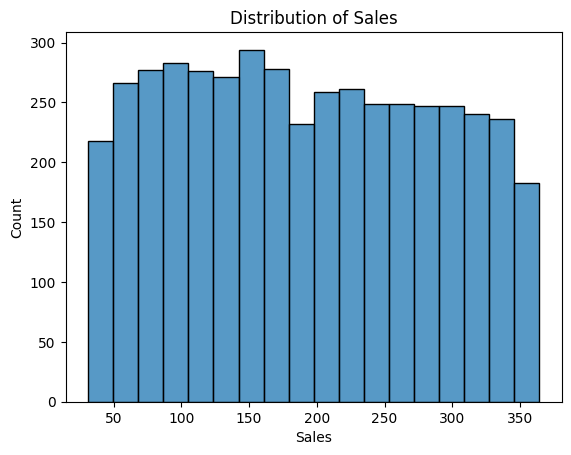

In [25]:
# Create a histogram of the Sales.

### YOUR CODE HERE ### 
fig = sn.histplot(data['Sales'])
# Add a title
fig.set_title('Distribution of Sales')


## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

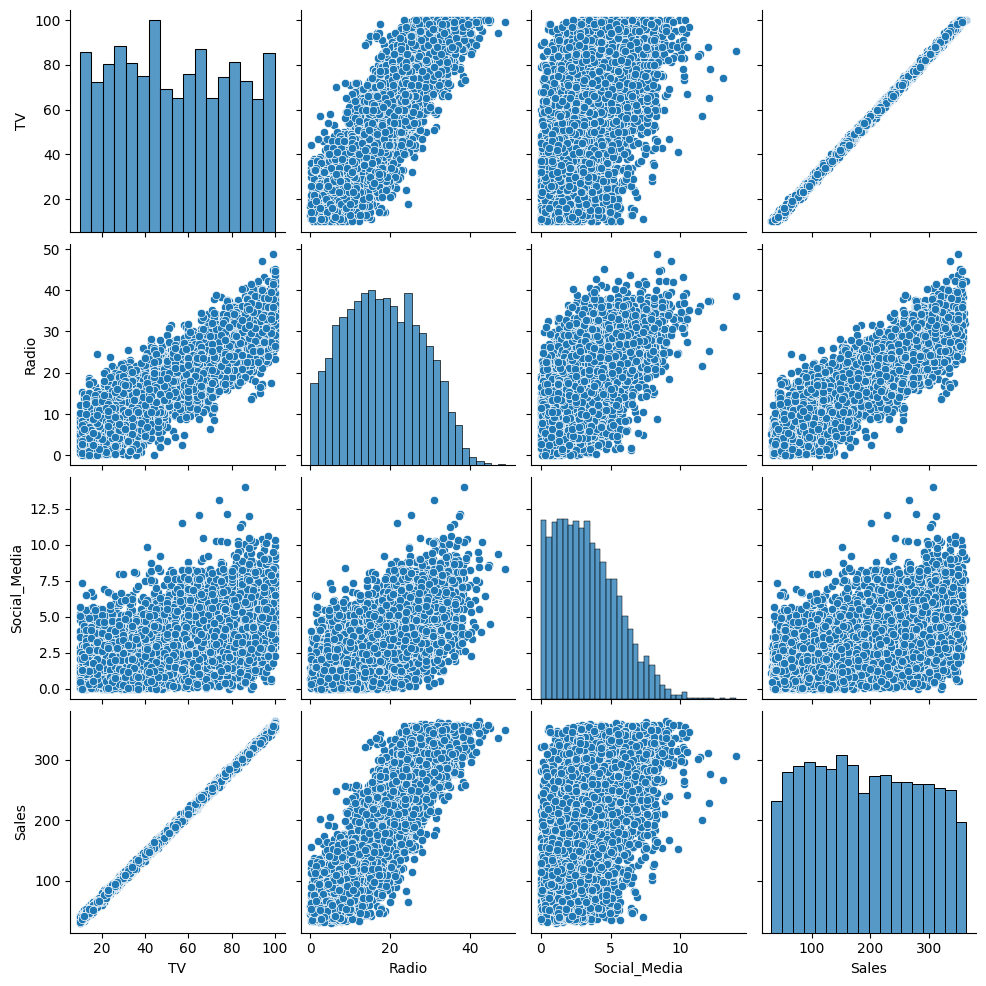

In [26]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sn.pairplot(data)

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [41]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = 'Sales ~ TV'
# Create an OLS model.

### YOUR CODE HERE ### 
OLS = sm.ols(formula = ols_formula, data = data)
# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()
# Save the results summary.

### YOUR CODE HERE ### 
model_results = model.summary()
# Display the model results.

### YOUR CODE HERE ### 
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:27:49   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

<Axes: xlabel='TV', ylabel='Sales'>

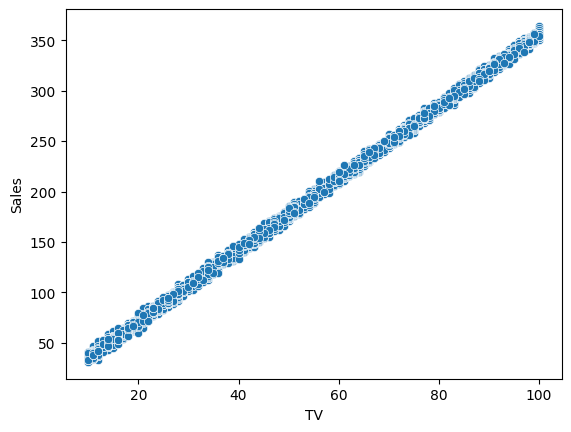

In [29]:
# Create a scatterplot comparing X and Sales (Y).

### YOUR CODE HERE ### 
sn.scatterplot(x = data['TV'], y = data['Sales'])

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

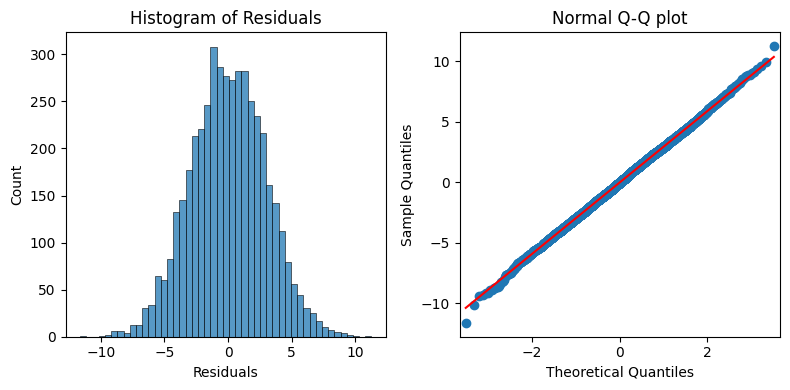

In [49]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(1,2, figsize = (8,4))
# Create a histogram with the residuals. 
sn.histplot(residuals, ax = axes[0])
### YOUR CODE HERE ### 


# Set the x label of the residual plot.
axes[0].set_xlabel('Residuals')
# Set the title of the residual plot.
axes[0].set_title('Histogram of Residuals')
# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 
stats.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Normal Q-Q plot')
# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

[]

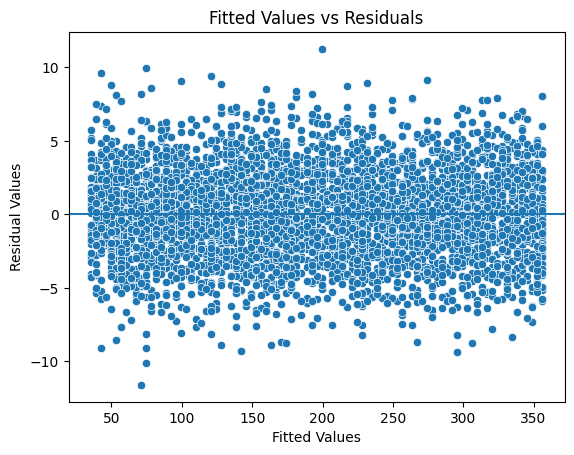

In [53]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
fig = sn.scatterplot(x = model.fittedvalues, y = residuals)

# Set the x-axis label.
fig.set_xlabel('Fitted Values')
# Set the y-axis label.
fig.set_ylabel('Residual Values')
# Set the title.
fig.set_title('Fitted Values vs Residuals')
# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
fig.axhline(0)

# Show the plot.
fig.plot()

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [54]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:27:49   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpret the model results

With the model fit evaluated, assess the coefficient estimates and the uncertainty of these estimates.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [55]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:27:49   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
"""